## Lens Tutorial

This tutorial illustrates the construction of optics.Lens objects in the MORTICIA sensor package.

In [1]:
import numpy as np
import pandas as pd
import xray
xD = xray.DataArray  # Abbreviation for creating xray.DataArray objects
import matplotlib.pyplot as plt
import scipy.interpolate
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
def U_(units):
    # Utility function for pint Quantity of 1.0 with given units
    return Q_(1.0, units)
%matplotlib inline

import optics
%load_ext autoreload
%aimport optics
%autoreload 1

In [2]:
# Create the lens transmission function - the fraction of light transmitted to the focal plane as a function
# of wavelength
# Transmission functions are assumed to be zero outside the defined range of the xray DataArray
spec_trans = xD([0.8, 0.9, 0.8], [('Wavelength', [500.0, 600.0, 900.0])], name='Transmission', 
                attrs={'units_Transmission': U_(''), 'units_Wavelength': U_('nm')})
spec_trans

<xray.DataArray 'Transmission' (Wavelength: 3)>
array([ 0.8,  0.9,  0.8])
Coordinates:
  * Wavelength  (Wavelength) float64 500.0 600.0 900.0
Attributes:
    units_Wavelength: 1.0 nanometer
    units_Transmission: 1.0 dimensionless

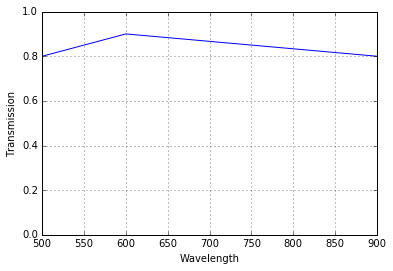

In [3]:
spec_trans.plot()
plt.ylim([0,1])
plt.grid()

In [4]:
# Build a lens with this spectral transmission function, EFL of 30 mm and focal ratio of 2
myLens = optics.Lens(efl=[30, 'mm'], fno=2.0, trn=spec_trans)